In [1]:
import pycaret
import pandas as pd

In [4]:
Datos = pd.read_excel('Datos_anonimizados_sin_llave.xlsx')
Datos

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,DiasEstanciaClinica,DiasEstanciaClinica_exacto,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,1,1.048533,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,4,3.943370,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,2,1.794684,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,3,2.564836,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,5,5.486410,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,2,2.565230,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,1,1.837406,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,1,1.015388,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,2,1.582988,4,10,242,0,0,NO,SI,NO


In [5]:
Datos.drop(["DiasEstanciaClinica_exacto","DiasEstanciaServicio"],axis=1,inplace=True)
Datos.drop([11314, 30453] , axis=0, inplace=True)
total           = Datos.isnull().sum().sort_values(ascending=False)
percent         = (Datos.isnull().sum()/Datos.isnull().count()*100).sort_values(ascending=False)
missing  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
lista = missing[missing["Percent"]>50].index.tolist()
Datos.drop(lista, axis= 1, inplace= True)

,AntencionPaciente llave,vGenero,EdadEgreso,Año_Salida,MES,Tipo_Afiliacion,Aseguradora,Modalidad_Contrato,Aseguradora2,Hospitalizacion,...,HorasdeAlta,DiasEstanciaClinica,MODALIDAD,SERVICIO_ADMITE,ID_Medico_registra,NombreTipoDiagnostico,Tipo_egreso,Transfusiones,Antioboticos,UCI_UCE
0,1,0,62,2022,Abril,2,69,1,43,3,...,48,1,2,4,155,1,0,NO,NO,NO
1,2,1,89,2022,Marzo,2,48,2,32,7,...,24,4,4,7,561,0,0,NO,NO,NO
2,3,1,90,2023,Septiembre,2,48,2,43,3,...,48,2,4,8,5,0,2,NO,SI,NO
3,4,1,88,2022,Enero,2,69,1,43,3,...,48,3,4,8,1,0,0,NO,SI,NO
4,5,0,89,2023,Agosto,3,69,1,43,3,...,24,5,4,8,167,0,0,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43149,43150,0,19,2023,Septiembre,2,48,1,43,3,...,120,2,4,8,171,1,0,NO,NO,NO
43150,43151,0,31,2023,Septiembre,2,48,1,43,3,...,72,1,4,8,555,1,0,NO,NO,NO
43151,43152,0,13,2023,Septiembre,2,48,1,43,8,...,0,1,4,10,478,0,0,NO,NO,NO
43152,43153,1,6,2023,Septiembre,1,26,1,43,3,...,144,2,4,10,242,0,0,NO,SI,NO


In [6]:
Datos.columns

Index(['AntencionPaciente llave', 'vGenero', 'EdadEgreso', 'Año_Salida', 'MES',
       'Tipo_Afiliacion', 'Aseguradora', 'Modalidad_Contrato', 'Aseguradora2',
       'Hospitalizacion', 'bloque', 'piso', 'Tipo_Internacion', 'Ciclo_Vital',
       'ESPECIALIDAD_GRD', 'DX_PRINCIPAL', 'D_DX_PPAL', 'D_Capitulo_CIE10',
       'RangoCapitulo', 'Categoria', 'D_subcapitulo_CIE10',
       'DescSubgrupoOncologia', 'SubgrupoOncologia',
       'ClasificacionCronico_DX_Principal', 'DX_MEDICO', 'D_DX_MEDICO',
       'ClasificacionCronico_DX_Medico', 'DX_R1', 'D_DX_R1',
       'ClasificacionCronico_DX_R1', 'DX_R2', 'D_DX_R2',
       'ClasificacionCronico_DX_R2', 'DX_R3', 'D_DX_R3',
       'ClasificacionCronico_DX_R3', 'DX_F3', 'D_DX_F3',
       'ClasificacionCronico_DX_F3', 'DX_F3_R1', 'D_DX_F3_R1',
       'ClasificacionCronico_DX_F3_R1', 'DX_F3_R2', 'D_DX_F3_R2',
       'ClasificacionCronico_DX_F3_R2', 'DX_F3_R3', 'D_DX_F3_R3',
       'ClasificacionCronico_DX_F3_R3', 'DX_pre_cx', 'D_DX_pre_cx',
      

In [8]:
Datos=pd.read_csv("datos_sin_encode.csv")
Datos.columns = Datos.columns.str.replace('[^a-zA-Z0-9_]', '_')
Datos.columns

Index(['AntencionPaciente_llave', 'vGenero', 'EdadEgreso', 'A_o_Salida', 'MES',
       'Tipo_Afiliacion', 'Aseguradora', 'Modalidad_Contrato', 'Aseguradora2',
       'Hospitalizacion', 'bloque', 'piso', 'Tipo_Internacion', 'Ciclo_Vital',
       'ESPECIALIDAD_GRD', 'DX_PRINCIPAL', 'D_DX_PPAL', 'D_Capitulo_CIE10',
       'RangoCapitulo', 'Categoria', 'D_subcapitulo_CIE10',
       'DescSubgrupoOncologia', 'SubgrupoOncologia',
       'ClasificacionCronico_DX_Principal', 'DX_MEDICO', 'D_DX_MEDICO',
       'ClasificacionCronico_DX_Medico', 'DX_R1', 'D_DX_R1',
       'ClasificacionCronico_DX_R1', 'DX_R2', 'D_DX_R2',
       'ClasificacionCronico_DX_R2', 'DX_R3', 'D_DX_R3',
       'ClasificacionCronico_DX_R3', 'DX_F3', 'D_DX_F3',
       'ClasificacionCronico_DX_F3', 'DX_F3_R1', 'DX_F3_R2', 'DX_F3_R3',
       'DX_pre_cx', 'DX_pos_cx', 'DX_MUERTE', 'Subcapitulo_DX_Muerte',
       'capitulo_DX_Muerte', 'HorasdeAlta', 'MODALIDAD', 'SERVICIO_ADMITE',
       'ID_Medico_registra', 'NombreTipoDiagnosti

In [10]:
importantant=["Hospitalizacion",
"Antioboticos",
"DX_pre_cx",
"DX_R3",
"UCI_UCE",
"D_DX_MEDICO",
"SubgrupoOncologia",
"DX_MUERTE",
"Transfusiones",
 'DiasEstanciaClinica_exactoLog'
]

In [11]:
Datos=Datos[importantant]
Datos

,Hospitalizacion,Antioboticos,DX_pre_cx,DX_R3,UCI_UCE,D_DX_MEDICO,SubgrupoOncologia,DX_MUERTE,Transfusiones,DiasEstanciaClinica_exactoLog
0,3,NO,-1,R11X,NO,VERTIGO PAROXISTICO BENIGNO,VERTIGO PAROXISTICO BENIGNO,-1,NO,0.047392
1,7,NO,-1,I120,NO,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,-1,NO,1.372036
2,3,SI,-1,I270,NO,DISNEA,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON IN...,J440,NO,0.584829
3,3,SI,-1,I120,NO,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES C...,OTRAS ENFERMEDADES PULMONARES INTERSTICIALES C...,-1,NO,0.941894
4,3,NO,-1,S098,NO,FRACTURA DE LA EPIFISIS SUPERIOR DEL HUMERO,FRACTURA DEL MALAR Y DEL HUESO MAXILAR SUPERIOR,-1,NO,1.702274
...,...,...,...,...,...,...,...,...,...,...
43149,3,NO,-1,R55X,NO,EPILEPSIA TIPO NO ESPECIFICADO,EPILEPSIA TIPO NO ESPECIFICADO,-1,NO,0.942048
43150,3,NO,-1,F329,NO,OTRAS ENFERMEDADES DE LAS GLANDULAS SALIVALES,OTRAS ENFERMEDADES DE LAS GLANDULAS SALIVALES,-1,NO,0.608355
43151,8,NO,-1,N898,NO,EPISODIO DEPRESIVO MODERADO,TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION,-1,NO,0.015271
43152,3,SI,S424,-1,NO,FRACTURA DE LA EPIFISIS INFERIOR DEL HUMERO,FRACTURA DE LA EPIFISIS INFERIOR DEL HUMERO,-1,NO,0.459314


In [12]:
from pycaret.regression import *
s=setup(Datos,target="DiasEstanciaClinica_exactoLog",session_id=23)

,Description,Value
0,Session id,23
1,Target,DiasEstanciaClinica_exactoLog
2,Target type,Regression
3,Original data shape,"(43154, 10)"
4,Transformed data shape,"(43154, 10)"
5,Transformed train set shape,"(30207, 10)"
6,Transformed test set shape,"(12947, 10)"
7,Ordinal features,3
8,Numeric features,1
9,Categorical features,8


In [74]:
get_config("X_train_transformed")[importantant]

,Hospitalizacion,Antioboticos,DX_pre_cx,DX_R3,UCI_UCE,D_DX_MEDICO,SubgrupoOncologia,DX_MUERTE,Transfusiones
9854,3.0,1.0,1.746946,1.801952,1.0,1.741953,1.681716,1.705671,0.0
22513,3.0,0.0,1.518258,1.627679,0.0,1.528511,1.502528,1.705671,0.0
598,3.0,0.0,1.518258,1.973534,0.0,1.664886,1.389143,1.705671,1.0
29065,3.0,0.0,1.518258,1.105978,0.0,1.597613,1.651222,1.705671,0.0
14291,3.0,0.0,1.518258,1.790377,1.0,1.956371,1.794883,1.705671,0.0
...,...,...,...,...,...,...,...,...,...
9704,3.0,0.0,1.518258,1.680691,0.0,1.951034,1.680598,1.705671,0.0
11190,6.0,1.0,1.518258,1.917344,0.0,1.686720,1.260641,1.045048,0.0
26569,8.0,0.0,1.518258,1.105978,0.0,1.472147,1.472147,1.705671,0.0
9256,3.0,0.0,1.518258,1.783176,1.0,1.605226,1.811212,1.705671,0.0


In [13]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.5198,0.4472,0.6686,0.5669,0.2750,3.2856,1.0340
lightgbm,Light Gradient Boosting Machine,0.5232,0.4521,0.6723,0.5621,0.2760,3.3241,0.1450
xgboost,Extreme Gradient Boosting,0.5277,0.4608,0.6787,0.5536,0.2778,3.3485,0.0560
gbr,Gradient Boosting Regressor,0.5301,0.4646,0.6815,0.5500,0.2790,3.2830,0.2160
rf,Random Forest Regressor,0.5482,0.4979,0.7055,0.5178,0.2877,3.3750,0.4980
lr,Linear Regression,0.5544,0.5165,0.7186,0.4999,0.2906,3.2284,0.4380
ridge,Ridge Regression,0.5544,0.5165,0.7186,0.4999,0.2906,3.2283,0.3550
lar,Least Angle Regression,0.5544,0.5165,0.7186,0.4999,0.2906,3.2284,0.0370
br,Bayesian Ridge,0.5544,0.5165,0.7186,0.4999,0.2906,3.2283,0.0390
huber,Huber Regressor,0.5538,0.5165,0.7186,0.4999,0.2907,3.2680,0.0710


In [24]:
regression_results=pull()
regression_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.749000e-01,3.719000e-01,6.097000e-01,6.398000e-01,0.2496,2.637900e+00,2.478
lightgbm,Light Gradient Boosting Machine,4.822000e-01,3.832000e-01,6.189000e-01,6.289000e-01,0.2526,2.696600e+00,0.588
et,Extra Trees Regressor,4.865000e-01,3.915000e-01,6.256000e-01,6.207000e-01,0.2551,2.890600e+00,4.725
gbr,Gradient Boosting Regressor,4.983000e-01,4.081000e-01,6.388000e-01,6.047000e-01,0.2604,2.924700e+00,1.842
rf,Random Forest Regressor,4.989000e-01,4.147000e-01,6.438000e-01,5.983000e-01,0.2603,2.889200e+00,4.657
br,Bayesian Ridge,5.126000e-01,4.277000e-01,6.539000e-01,5.858000e-01,0.2688,3.080400e+00,0.618
ridge,Ridge Regression,5.130000e-01,4.289000e-01,6.548000e-01,5.846000e-01,0.2689,3.081300e+00,0.696
lr,Linear Regression,5.132000e-01,4.300000e-01,6.557000e-01,5.836000e-01,0.2691,3.081400e+00,0.905
omp,Orthogonal Matching Pursuit,5.539000e-01,5.188000e-01,7.202000e-01,4.976000e-01,0.2879,3.031300e+00,0.408
ada,AdaBoost Regressor,6.012000e-01,5.668000e-01,7.528000e-01,4.512000e-01,0.3179,4.781900e+00,2.847


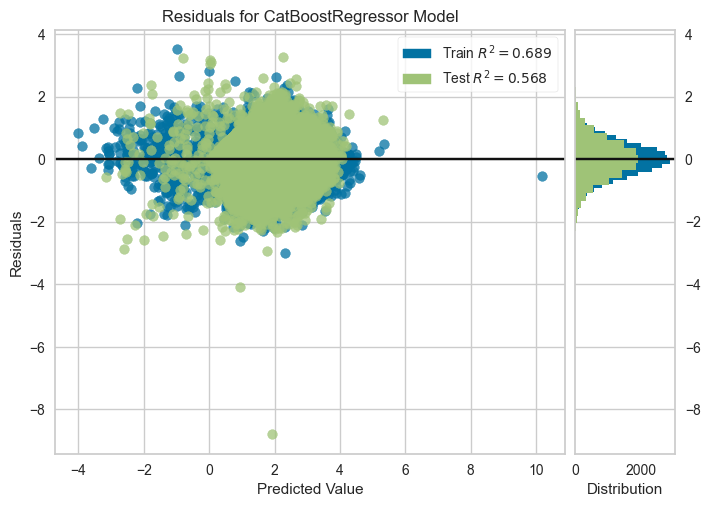

In [14]:
plot_model(best,plot="residuals")

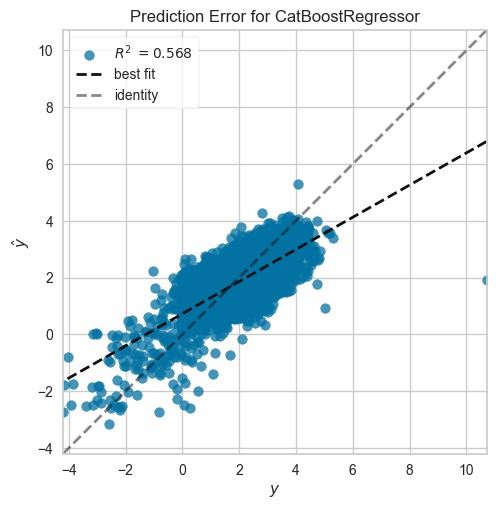

In [15]:
plot_model(best, plot = 'error')

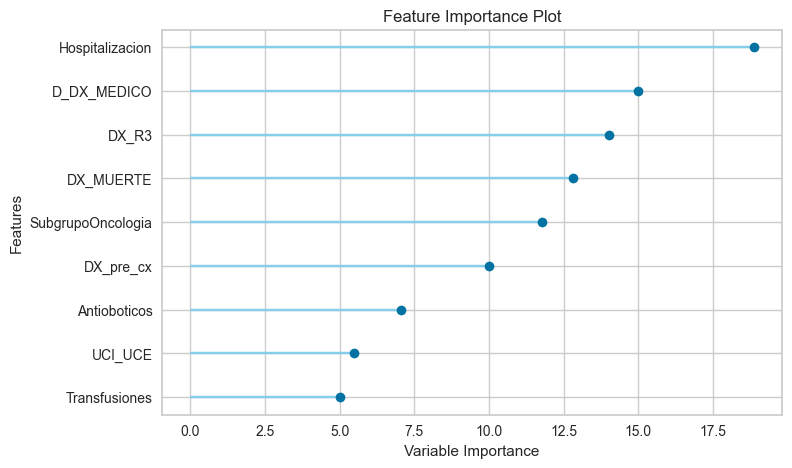

In [16]:
plot_model(best, plot = 'feature')

In [34]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.5175,0.4411,0.6641,0.5678,0.2737,3.9448


In [18]:
holdout_pred

,Hospitalizacion,Antioboticos,DX_pre_cx,DX_R3,UCI_UCE,D_DX_MEDICO,SubgrupoOncologia,DX_MUERTE,Transfusiones,DiasEstanciaClinica_exactoLog,prediction_label
19012,3,NO,M545,I10X,NO,RADICULOPATIA,LUMBAGO NO ESPECIFICADO,-1,NO,1.431199,1.564720
29730,3,SI,S028,-1,NO,FRACTURA DE OTROS HUESOS DEL CRANEO Y DE LA CARA,FRACTURA DEL MAXILAR INFERIOR,-1,NO,0.821633,1.178058
1645,6,NO,-1,I132,SI,OTRAS SEPTICEMIAS ESPECIFICADAS,LEUCEMIA AGUDA CELULAS DE TIPO NO ESPECIFICADO,C950,SI,1.034260,1.899883
16311,6,SI,-1,J440,SI,CHOQUE SEPTICO,COLANGITIS,K830,NO,2.706643,1.557014
35220,3,SI,-1,Z954,NO,ORQUITIS EPIDIDIMITIS Y ORQUIEPIDIDIMITIS SIN...,ORQUITIS EPIDIDIMITIS Y ORQUIEPIDIDIMITIS SIN...,-1,NO,1.930610,1.101916
...,...,...,...,...,...,...,...,...,...,...,...
20269,3,NO,S722,S708,NO,CONTUSION DEL TORAX,FRACTURA SUBTROCANTERIANA,-1,NO,1.913378,1.747249
23532,7,NO,-1,R521,NO,ATENCION PALIATIVA,TUMOR MALIGNO DEL RINON EXCEPTO DE LA PELVIS ...,-1,NO,1.348984,0.876237
16889,7,NO,-1,-1,NO,DORSALGIA NO ESPECIFICADA,DORSALGIA NO ESPECIFICADA,-1,NO,0.969959,0.883139
17196,3,NO,-1,I500,SI,OTROS TIPOS DE HIPERTENSION SECUNDARIA,ANEURISMA CEREBRAL SIN RUPTURA,-1,NO,3.319085,2.338432


In [19]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py
